# Tasks:

1. Load the JSON file and check for missing or duplicated data.

2. Calculate average salary and performance per department.

3. Create a new column PerformanceLevel:

    Score ≥ 9 → “Excellent”

    7 ≤ Score < 9 → “Good”

    < 7 → “Needs Improvement”

4. Use NumPy to normalize the Salary column (min-max normalization).

5. Find correlation between Experience, Salary, and PerformanceScore.

6. Compute which department gives highest salary per year of experience.

7. Use groupby to find average work-from-home days by performance level.

In [17]:
import pandas as pd
import numpy as np

In [18]:
#1. Load the JSON file and check for missing or duplicated data
df=pd.read_json("employee_performance.json")
df

,EmployeeID,Name,Department,Experience,Salary,PerformanceScore,WorkFromHomeDays
0,1,Aarav,HR,3,35000,7.5,10
1,2,Isha,IT,5,60000,8.9,6
2,3,Rohan,Finance,2,40000,6.8,12
3,4,Priya,IT,7,75000,9.2,4
4,5,Aditya,HR,4,42000,7.0,9
5,6,Sneha,Finance,6,65000,8.1,8
6,7,Dev,IT,1,30000,6.5,14
7,8,Tanya,Finance,8,80000,9.5,3


In [19]:
#1. Load the JSON file and check for missing or duplicated data
df.isnull()

,EmployeeID,Name,Department,Experience,Salary,PerformanceScore,WorkFromHomeDays
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False


In [20]:
#1. Load the JSON file and check for missing or duplicated data
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [21]:
average=df.groupby("Department")["Salary"].mean().astype(np.float32)
print(f"Average salary per department: {average}")

Average salary per department: Department
Finance    61666.667969
HR         38500.000000
IT         55000.000000
Name: Salary, dtype: float32


In [22]:
performance=df.groupby("Department")["PerformanceScore"].mean().astype(np.float32)
print(f"Average performance per department: {performance}")

Average performance per department: Department
Finance    8.133333
HR         7.250000
IT         8.200000
Name: PerformanceScore, dtype: float32


In [23]:
conds = [
    (df["PerformanceScore"] >= 9),
    (df["PerformanceScore"] >= 7) & (df["PerformanceScore"] < 9),
    (df["PerformanceScore"] < 7)
]

choices = ["Excellent", "Good", "Needs Improvement"]

df["PerformanceLevel"] = np.select(conds, choices, default="Unknown")


In [ ]:
df

,EmployeeID,Name,Department,Experience,Salary,PerformanceScore,WorkFromHomeDays,PerformanceLevel
0,1,Aarav,HR,3,35000,7.5,10,Good
1,2,Isha,IT,5,60000,8.9,6,Good
2,3,Rohan,Finance,2,40000,6.8,12,Needs Improvement
3,4,Priya,IT,7,75000,9.2,4,Excellent
4,5,Aditya,HR,4,42000,7.0,9,Good
5,6,Sneha,Finance,6,65000,8.1,8,Good
6,7,Dev,IT,1,30000,6.5,14,Needs Improvement
7,8,Tanya,Finance,8,80000,9.5,3,Excellent


At first I tried using np.where to compute the PerformanceLevel column,
(code: 
```python
df["PerformanceLevel"]=np.where(df["PerformanceScore"]>=9,"Excellent",df["PerformanceScore"]>=7 and df["PerformanceScore"]<9,"Good",df["PerformanceScore"]<7,"Needs Improvement") )
```
but then I got to know np.where only takes 3 arguments: np.where(condition, value_if_true, value_if_false).

For 3+ categories you must nest np.where or use np.select

So I decided to use np.select because it's syntax was clean and easy to understand.

code:
```python
conds = [
    (df["PerformanceScore"] >= 9),
    (df["PerformanceScore"] >= 7) & (df["PerformanceScore"] < 9),
    (df["PerformanceScore"] < 7)
]

choices = ["Excellent", "Good", "Needs Improvement"]

df["PerformanceLevel"] = np.select(conds, choices)
```
But even after using np.select properly I ran into an error

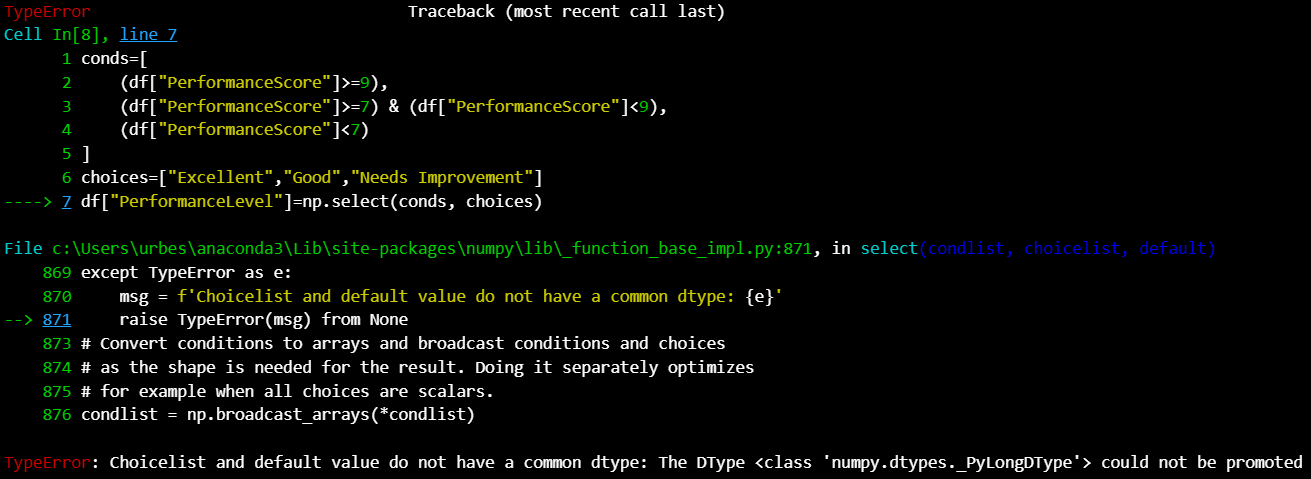

After studying the error I understood that:

Choicelist and default value do not have a common dtype”

means that NumPy is expecting all choices to be the same data type, but internally it’s comparing them with a missing or mismatched default value (which defaults to 0 — an integer)

After some fix

code:
```python
conds = [
    (df["PerformanceScore"] >= 9),
    (df["PerformanceScore"] >= 7) & (df["PerformanceScore"] < 9),
    (df["PerformanceScore"] < 7)
]

choices = ["Excellent", "Good", "Needs Improvement"]

df["PerformanceLevel"] = np.select(conds, choices, default="Unknown")
```

# Why this fix works
    By default, np.select sets default=0 (an integer).

    Since choices list contains strings, NumPy throws a type mismatch error.

    Setting default="Unknown" makes all results strings, fixing the dtype conflict.